# Leitura da Curva de Carga

Arquivo para realizar a leitura dos dados da curva de carga proveniente do arquivo "curva_carga.xlsx", e calcular as probabilidades de ocorrência de cada patamar de carga.

### 1 - Realizar leitura do arquivo

In [1]:
import openpyxl

# Load the Excel file
file_path = 'curva de carga.xlsx'  # Replace with the path to your Excel file
workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active

# Initialize 6 empty lists to store the scenarios
sem_inverno = []
fds_inverno = []
sem_verao = []
fds_verao = []
sem_outono = []
fds_outono = []

# Loop through each row (hour)
for row in sheet.iter_rows(min_row=5, max_row=28, values_only=True):
    # Assuming that each row contains 6 scenarios (columns A to F)
    sem_inverno.append(row[1])
    fds_inverno.append(row[2])
    sem_verao.append(row[3])
    fds_verao.append(row[4])
    sem_outono.append(row[5])
    fds_outono.append(row[6])

# Close the Excel file
workbook.close()


In [2]:
print(sem_inverno)
print(fds_inverno)
print(sem_verao)
print(fds_verao)
print(sem_outono)
print(fds_outono)


[67, 67, 63, 60, 59, 59, 60, 74, 86, 95, 96, 96, 95, 95, 93, 94, 99, 100, 100, 96, 91, 83, 73, 63]
[78, 72, 68, 66, 64, 65, 66, 70, 80, 88, 90, 91, 90, 88, 87, 87, 91, 100, 99, 97, 94, 92, 87, 81]
[64, 60, 58, 56, 56, 58, 64, 76, 87, 95, 99, 100, 99, 100, 100, 97, 96, 96, 93, 92, 92, 93, 87, 72]
[74, 70, 66, 65, 64, 62, 62, 66, 81, 86, 91, 93, 93, 92, 91, 91, 92, 94, 95, 95, 100, 93, 88, 80]
[63, 62, 60, 58, 59, 65, 72, 85, 95, 99, 100, 99, 93, 92, 90, 88, 90, 92, 96, 98, 96, 90, 80, 70]
[75, 73, 69, 66, 65, 65, 68, 74, 83, 89, 92, 94, 91, 90, 90, 86, 85, 88, 92, 100, 97, 95, 90, 85]


### 2 - Criar dataframe 24 x 365 com os dados da curva de carga

In [3]:
import numpy as np


inverno = list(range(0, 8)) + list(range(43, 53))
verao = list(range(17, 30))
outono = list(range(8, 17)) + list(range(30, 43))

curva_anual = np.zeros([24,365])

for i in range(0,365):
    if (np.floor(i/7)) in inverno:
        if i%7 in [5,6]:
            curva_anual[:,i] = fds_inverno
        else:
            curva_anual[:,i] = sem_inverno

    elif (np.floor(i/7)) in verao:
        if i%7 in [5,6]:
            curva_anual[:,i] = fds_verao
        else:
            curva_anual[:,i] = sem_verao

    elif (np.floor(i/7)) in outono:
        if i%7 in [5,6]:
            curva_anual[:,i] = fds_outono
        else:
            curva_anual[:,i] = sem_outono
            


In [4]:
import pandas as pd

df = pd.DataFrame(curva_anual)
df

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,67.0,67.0,67.0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,78.0,78.0,67.0,67.0,67.0,67.0,67.0,78.0,78.0,67.0
1,67.0,67.0,67.0,67.0,67.0,72.0,72.0,67.0,67.0,67.0,...,72.0,72.0,67.0,67.0,67.0,67.0,67.0,72.0,72.0,67.0
2,63.0,63.0,63.0,63.0,63.0,68.0,68.0,63.0,63.0,63.0,...,68.0,68.0,63.0,63.0,63.0,63.0,63.0,68.0,68.0,63.0
3,60.0,60.0,60.0,60.0,60.0,66.0,66.0,60.0,60.0,60.0,...,66.0,66.0,60.0,60.0,60.0,60.0,60.0,66.0,66.0,60.0
4,59.0,59.0,59.0,59.0,59.0,64.0,64.0,59.0,59.0,59.0,...,64.0,64.0,59.0,59.0,59.0,59.0,59.0,64.0,64.0,59.0
5,59.0,59.0,59.0,59.0,59.0,65.0,65.0,59.0,59.0,59.0,...,65.0,65.0,59.0,59.0,59.0,59.0,59.0,65.0,65.0,59.0
6,60.0,60.0,60.0,60.0,60.0,66.0,66.0,60.0,60.0,60.0,...,66.0,66.0,60.0,60.0,60.0,60.0,60.0,66.0,66.0,60.0
7,74.0,74.0,74.0,74.0,74.0,70.0,70.0,74.0,74.0,74.0,...,70.0,70.0,74.0,74.0,74.0,74.0,74.0,70.0,70.0,74.0
8,86.0,86.0,86.0,86.0,86.0,80.0,80.0,86.0,86.0,86.0,...,80.0,80.0,86.0,86.0,86.0,86.0,86.0,80.0,80.0,86.0
9,95.0,95.0,95.0,95.0,95.0,88.0,88.0,95.0,95.0,95.0,...,88.0,88.0,95.0,95.0,95.0,95.0,95.0,88.0,88.0,95.0


### 3 - Realizar contagem dos patamares de carga

In [5]:
# Calculate the value counts
value_counts = df.stack().value_counts()

# Display the result
print(value_counts)


96.0     608
100.0    581
90.0     530
95.0     529
92.0     524
99.0     470
93.0     404
60.0     347
63.0     282
59.0     282
91.0     276
65.0     258
88.0     248
58.0     240
87.0     232
72.0     209
85.0     198
94.0     190
64.0     190
67.0     172
80.0     170
70.0     170
66.0     164
62.0     162
86.0     156
74.0     156
97.0     143
83.0     130
73.0     130
56.0     130
98.0     110
68.0      78
76.0      65
81.0      60
89.0      44
69.0      44
75.0      44
78.0      34
Name: count, dtype: int64


In [6]:
valores_curva = value_counts.index.to_numpy()
contagem_valores = value_counts.values

print("Valores da curva de carga: ")
print(valores_curva)
print("\nContagem de cada valor: ")
print(contagem_valores)

Valores da curva de carga: 
[ 96. 100.  90.  95.  92.  99.  93.  60.  63.  59.  91.  65.  88.  58.
  87.  72.  85.  94.  64.  67.  80.  70.  66.  62.  86.  74.  97.  83.
  73.  56.  98.  68.  76.  81.  89.  69.  75.  78.]

Contagem de cada valor: 
[608 581 530 529 524 470 404 347 282 282 276 258 248 240 232 209 198 190
 190 172 170 170 164 162 156 156 143 130 130 130 110  78  65  60  44  44
  44  34]


In [7]:
print(len(valores_curva))

total_horas = np.sum(contagem_valores)
print(total_horas)

38
8760


### 4 - Calcular probabilidades

In [8]:
prob_valores = contagem_valores / total_horas
print(prob_valores)

[0.06940639 0.0663242  0.06050228 0.06038813 0.05981735 0.05365297
 0.04611872 0.03961187 0.03219178 0.03219178 0.03150685 0.02945205
 0.0283105  0.02739726 0.02648402 0.02385845 0.02260274 0.0216895
 0.0216895  0.0196347  0.01940639 0.01940639 0.01872146 0.01849315
 0.01780822 0.01780822 0.0163242  0.01484018 0.01484018 0.01484018
 0.01255708 0.00890411 0.00742009 0.00684932 0.00502283 0.00502283
 0.00502283 0.00388128]


In [9]:
df = pd.DataFrame({'Valor de Carga': valores_curva, 'Probabilidade': prob_valores})

# add index label to df
df.index.name = 'Num.'

In [10]:
# acumular valores da menor probabilidade para a maior (ordem crescente)
prob_acumulada = np.cumsum(prob_valores[::-1])[::-1]
# print(prob_acumulada)

# adicionar coluna de probabilidade acumulada ao dataframe
df['Prob. Acumulada'] = prob_acumulada
df

,Valor de Carga,Probabilidade,Prob. Acumulada
Num.,,,
0,96.0,0.069406,1.000000
1,100.0,0.066324,0.930594
2,90.0,0.060502,0.864269
3,95.0,0.060388,0.803767
4,92.0,0.059817,0.743379
5,99.0,0.053653,0.683562
6,93.0,0.046119,0.629909
7,60.0,0.039612,0.583790
8,63.0,0.032192,0.544178


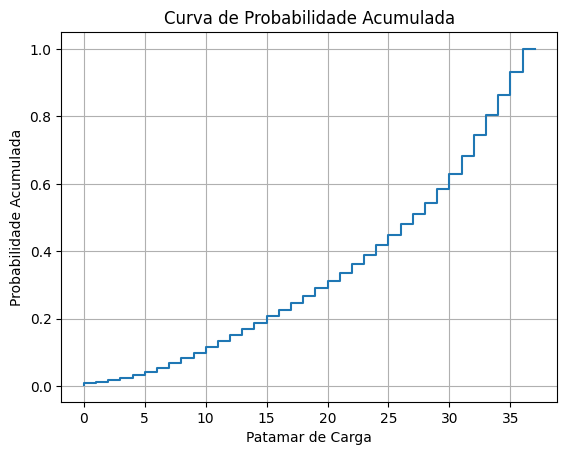

In [11]:
# plotar curva de probabilidade acumulada, em degraus, em ordem crescente
import matplotlib.pyplot as plt

plt.step(list(range(0, len(valores_curva))), prob_acumulada[::-1])
plt.xlabel('Patamar de Carga')
plt.ylabel('Probabilidade Acumulada')
plt.title('Curva de Probabilidade Acumulada')
plt.grid(True)
plt.show()




In [13]:
# exportar dataframe para arquivo xlsx
df.to_excel("dataframe_curva_de_carga.xlsx")